Case Study Seven: 

By: Allen Hoskins & Brittany Lewandowski

Allen's Import statement:

In [ ]:
#Converting our final_project csv to a data frame and decoding it using a method of utf-8:
df = pd.read_pickle(r'/Users/allen/Desktop/MSDS/QTW/large datasets/cs7/data_sets/cs7.pkl.gzip',compression='gzip')

In [ ]:
!pip install catboost==0.14.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import catboost
print(catboost.__version__)

0.14.2


In [ ]:
#Importing in required libraries:

import pandas as pd
import numpy as np
import io 
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_project(5).csv to final_project(5).csv


In [ ]:
#Converting our final_project csv to a data frame and decoding it using a method of utf-8:

df=pd.read_csv(io.StringIO(uploaded['final_project(5).csv'].decode('utf-8')))
df

x0        x1         x2         x3        x4         x5  \
0      -0.166563 -3.961588   4.621113   2.481908 -1.800135   0.804684   
1      -0.149894 -0.585676  27.839856   4.152333  6.426802  -2.426943   
2      -0.321707 -1.429819  12.251561   6.586874 -5.304647 -11.311090   
3      -0.245594  5.076677 -24.149632   3.637307  6.505811   2.290224   
4      -0.273366  0.306326 -11.352593   1.676758  2.928441  -0.616824   
...          ...       ...        ...        ...       ...        ...   
159995 -0.487024 -4.270269   0.417395  -1.992423  1.757552  -1.167819   
159996  0.825477  4.804368  22.161535  11.371303  1.715901   6.990759   
159997 -0.802489  5.362696   7.243419  -7.496074  2.295250  -2.756067   
159998  0.339237  7.609895   5.368414  -2.825481  4.046102  15.322603   
159999 -0.296748 -0.412773 -10.911407  -5.633629 -4.028154  15.939428   

               x6         x7         x8        x9  ...        x41       x42  \
0        6.718751 -14.789997  -1.040673 -4.204950  ...  -1.497117  5.414063   
1       40.477058  -6.725709   0.896421  0.330165  ...  36.292790  4.490915   
2       17.812850  11.060572   5.325880 -2.632984  ...  -0.368491  9.088864   
3      -35.111751 -18.913592  -0.337041 -5.568076  ...  15.691546 -7.467775   
4      -16.505817  27.532281   1.199715 -4.309105  ... -13.911297 -5.229937   
...           ...        ...        ...       ...  ...        ...       ...   
159995   0.606860  41.084463  -1.923188 -2.374213  ...  -9.390451  8.096802   
159996  32.221207 -12.278038  -3.861086  6.715126  ...  12.803189  0.841446   
159997  10.531388  42.515821   1.420984  6.788916  ...  -0.346570 -0.144098   
159998   7.805271 -10.233054   2.609986  4.251127  ...  -0.307656 -0.601145   
159999 -15.864365 -46.388192  18.339472 -4.575499  ...  27.837473  1.392395   

             x43       x44       x45        x46       x47       x48  \
0      -2.325655  1.674827 -0.264332  60.781427 -7.689696  0.151589   
1       0.762561  6.526662  1.007927  15.805696 -4.896678 -0.320283   
2      -0.689886 -2.731118  0.754200  30.856417 -7.428573 -2.090804   
3       2.940789 -6.424112  0.419776 -72.424569  5.361375  1.806070   
4       1.783928  3.957801 -0.096988 -14.085435 -0.208351 -0.894942   
...          ...       ...       ...        ...       ...       ...   
159995 -0.875131 -1.413787 -0.363968  15.339392  4.364205 -3.831489   
159996 -0.682177 -5.047677 -0.017898   0.780130  6.387266 -1.374742   
159997  0.738298  7.241041  0.215347 -12.155249  3.265263  1.230963   
159998 -3.443112  0.549931  0.206728   5.081980  1.701462 -0.279619   
159999  0.893555 -1.848590 -0.423982 -17.379380  5.916490 -2.767444   

              x49  y  
0       -8.040166  0  
1       16.719974  0  
2       -7.869421  0  
3       -7.670847  0  
4       15.724742  1  
...           ... ..  
159995  28.389858  1  
159996  -1.623952  0  
159997   3.335471  1  
159998  -1.986424  0  
159999  15.547557  1  

[160000 rows x 51 columns]

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
#Function to parse the percentage sign out of values in variable x32:

def parseFloat(str):
    try:
        return float(str)
    except:
        str = str.strip()
        if str.endswith("%"):
            return float(str.strip("%").strip()) / 100
        raise Exception("Don't know how to parse %s" % str)

df['x32'] = df['x32'].apply(parseFloat)

In [ ]:
df.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9        x10        x11        x12       x13  \
0 -14.789997 -1.040673 -4.204950   6.187465  13.251523  25.665413 -5.017267   
1  -6.725709  0.896421  0.330165 -11.708859  -2.352809 -25.014934  9.799608   
2  11.060572  5.325880 -2.632984   1.572647  -4.170771  12.078602 -5.158498   
3 -18.913592 -0.337041 -5.568076  -2.000255 -19.286668  10.995330 -5.914378   
4  27.532281  1.199715 -4.309105   6.667530   1.965913 -28.106348 -1.258950   

         x14       x15       x16        x17       x18       x19       x20  \
0  10.503714 -2.517678  2.117910   5.865923 -6.666158  1.791497 -1.909114   
1 -10.960705  1.504000 -2.397836  -9.301839 -1.999413  5.045258 -5.809984   
2   7.302780 -2.192431 -4.065428  -7.675055  4.041629 -6.633628  1.700321   
3   2.511400  1.292362 -2.496882 -15.722954 -2.735382  1.117536  1.923670   
4   5.759941  0.472584 -1.150097 -14.118709  4.527964 -1.284372 -9.026317   

         x21       x22        x23     x24       x25       x26       x27  \
0  -1.737940 -2.516715   3.553013  euorpe -0.801340  1.142950  1.005131   
1  10.814319 -0.478112  10.590601    asia  0.818792 -0.642987  0.751086   
2  -2.419221  2.467521  -5.270615    asia -0.718315 -0.566757  4.171088   
3 -14.179167  1.470625 -11.484431    asia -0.052430 -0.558582  9.215569   
4  -7.039818 -1.978748 -15.998166    asia -0.223449  0.350781  1.811182   

         x28   x29        x30       x31     x32       x33        x34  \
0 -18.473784  July    tuesday -3.851669  0.0000 -1.940031  -5.492063   
1   3.749377   Aug  wednesday  1.391594 -0.0002  2.211462  -4.460591   
2  11.522448  July  wednesday -3.262082 -0.0001  0.419607  -3.804056   
3  30.595226  July  wednesday -2.285241  0.0001 -3.442715   4.420160   
4  -4.094084  July    tuesday  0.921047  0.0001 -0.431640  12.165494   

        x35       x36        x37        x38       x39        x40        x41  \
0  0.627121 -0.873824   $1313.96  -1.353729 -5.186148 -10.612200  -1.497117   
1  1.035461  0.228270   $1962.78  32.816804 -5.150012   2.147427  36.292790   
2 -0.763357 -1.612561    $430.47  -0.333199  8.728585  -0.863137  -0.368491   
3  1.164532  3.033455  $-2366.29  14.188669 -6.385060  12.084421  15.691546   
4 -0.167726 -0.341604   $-620.66 -12.578926  1.133798  30.004727 -13.911297   

        x42       x43       x44       x45        x46       x47       x48  \
0  5.414063 -2.325655  1.674827 -0.264332  60.781427 -7.689696  0.151589   
1  4.490915  0.762561  6.526662  1.007927  15.805696 -4.896678 -0.320283   
2  9.088864 -0.689886 -2.731118  0.754200  30.856417 -7.428573 -2.090804   
3 -7.467775  2.940789 -6.424112  0.419776 -72.424569  5.361375  1.806070   
4 -5.229937  1.783928  3.957801 -0.096988 -14.085435 -0.208351 -0.894942   

         x49  y  
0  -8.040166  0  
1  16.719974  0  
2  -7.869421  0  
3  -7.670847  0  
4  15.724742  1

In [ ]:
#Removing dollar sign from X37:

df['x37'] = df['x37'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [ ]:
df.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9        x10        x11        x12       x13  \
0 -14.789997 -1.040673 -4.204950   6.187465  13.251523  25.665413 -5.017267   
1  -6.725709  0.896421  0.330165 -11.708859  -2.352809 -25.014934  9.799608   
2  11.060572  5.325880 -2.632984   1.572647  -4.170771  12.078602 -5.158498   
3 -18.913592 -0.337041 -5.568076  -2.000255 -19.286668  10.995330 -5.914378   
4  27.532281  1.199715 -4.309105   6.667530   1.965913 -28.106348 -1.258950   

         x14       x15       x16        x17       x18       x19       x20  \
0  10.503714 -2.517678  2.117910   5.865923 -6.666158  1.791497 -1.909114   
1 -10.960705  1.504000 -2.397836  -9.301839 -1.999413  5.045258 -5.809984   
2   7.302780 -2.192431 -4.065428  -7.675055  4.041629 -6.633628  1.700321   
3   2.511400  1.292362 -2.496882 -15.722954 -2.735382  1.117536  1.923670   
4   5.759941  0.472584 -1.150097 -14.118709  4.527964 -1.284372 -9.026317   

         x21       x22        x23     x24       x25       x26       x27  \
0  -1.737940 -2.516715   3.553013  euorpe -0.801340  1.142950  1.005131   
1  10.814319 -0.478112  10.590601    asia  0.818792 -0.642987  0.751086   
2  -2.419221  2.467521  -5.270615    asia -0.718315 -0.566757  4.171088   
3 -14.179167  1.470625 -11.484431    asia -0.052430 -0.558582  9.215569   
4  -7.039818 -1.978748 -15.998166    asia -0.223449  0.350781  1.811182   

         x28   x29        x30       x31     x32       x33        x34  \
0 -18.473784  July    tuesday -3.851669  0.0000 -1.940031  -5.492063   
1   3.749377   Aug  wednesday  1.391594 -0.0002  2.211462  -4.460591   
2  11.522448  July  wednesday -3.262082 -0.0001  0.419607  -3.804056   
3  30.595226  July  wednesday -2.285241  0.0001 -3.442715   4.420160   
4  -4.094084  July    tuesday  0.921047  0.0001 -0.431640  12.165494   

        x35       x36      x37        x38       x39        x40        x41  \
0  0.627121 -0.873824  1313.96  -1.353729 -5.186148 -10.612200  -1.497117   
1  1.035461  0.228270  1962.78  32.816804 -5.150012   2.147427  36.292790   
2 -0.763357 -1.612561   430.47  -0.333199  8.728585  -0.863137  -0.368491   
3  1.164532  3.033455 -2366.29  14.188669 -6.385060  12.084421  15.691546   
4 -0.167726 -0.341604  -620.66 -12.578926  1.133798  30.004727 -13.911297   

        x42       x43       x44       x45        x46       x47       x48  \
0  5.414063 -2.325655  1.674827 -0.264332  60.781427 -7.689696  0.151589   
1  4.490915  0.762561  6.526662  1.007927  15.805696 -4.896678 -0.320283   
2  9.088864 -0.689886 -2.731118  0.754200  30.856417 -7.428573 -2.090804   
3 -7.467775  2.940789 -6.424112  0.419776 -72.424569  5.361375  1.806070   
4 -5.229937  1.783928  3.957801 -0.096988 -14.085435 -0.208351 -0.894942   

         x49  y  
0  -8.040166  0  
1  16.719974  0  
2  -7.869421  0  
3  -7.670847  0  
4  15.724742  1

In [ ]:
#Viewing our columns' data types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [ ]:
#Viewing classes in our categorical columns:

print(f'Column X24 Unique values:\n {df.x24.unique()}\n')
print(f'Column X29 Unique values:\n {df.x29.unique()}\n')
print(f'Column X30 Unique values:\n {df.x30.unique()}')

Column X24 Unique values:
 ['euorpe' 'asia' 'america' nan]

Column X29 Unique values:
 ['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' nan 'Mar' 'Feb' 'Dev'
 'January']

Column X30 Unique values:
 ['tuesday' 'wednesday' 'thurday' 'monday' 'friday' nan]


In [ ]:
#Replacing nan values in categorical columns with the value "Unknown":

for col in ['x24', 'x29','x30']:
    df[col] = df[col].replace(np.nan, 'Unknown', regex=True)

In [ ]:
#Renaming our month column for consistency:

x29_map = {'July':'July', 'Aug':'August', 'Jun':'June', 'May':'May', 'sept.':'September',
             'Apr':'April','Nov':'November', 'Oct':'October','Unknown':'Unknown',
             'Mar':'March', 'Feb':'February','Dev':'December','January':'January'}\

df['x29'] = df['x29'].map(x29_map) 

In [ ]:
df.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9        x10        x11        x12       x13  \
0 -14.789997 -1.040673 -4.204950   6.187465  13.251523  25.665413 -5.017267   
1  -6.725709  0.896421  0.330165 -11.708859  -2.352809 -25.014934  9.799608   
2  11.060572  5.325880 -2.632984   1.572647  -4.170771  12.078602 -5.158498   
3 -18.913592 -0.337041 -5.568076  -2.000255 -19.286668  10.995330 -5.914378   
4  27.532281  1.199715 -4.309105   6.667530   1.965913 -28.106348 -1.258950   

         x14       x15       x16        x17       x18       x19       x20  \
0  10.503714 -2.517678  2.117910   5.865923 -6.666158  1.791497 -1.909114   
1 -10.960705  1.504000 -2.397836  -9.301839 -1.999413  5.045258 -5.809984   
2   7.302780 -2.192431 -4.065428  -7.675055  4.041629 -6.633628  1.700321   
3   2.511400  1.292362 -2.496882 -15.722954 -2.735382  1.117536  1.923670   
4   5.759941  0.472584 -1.150097 -14.118709  4.527964 -1.284372 -9.026317   

         x21       x22        x23     x24       x25       x26       x27  \
0  -1.737940 -2.516715   3.553013  euorpe -0.801340  1.142950  1.005131   
1  10.814319 -0.478112  10.590601    asia  0.818792 -0.642987  0.751086   
2  -2.419221  2.467521  -5.270615    asia -0.718315 -0.566757  4.171088   
3 -14.179167  1.470625 -11.484431    asia -0.052430 -0.558582  9.215569   
4  -7.039818 -1.978748 -15.998166    asia -0.223449  0.350781  1.811182   

         x28     x29        x30       x31     x32       x33        x34  \
0 -18.473784    July    tuesday -3.851669  0.0000 -1.940031  -5.492063   
1   3.749377  August  wednesday  1.391594 -0.0002  2.211462  -4.460591   
2  11.522448    July  wednesday -3.262082 -0.0001  0.419607  -3.804056   
3  30.595226    July  wednesday -2.285241  0.0001 -3.442715   4.420160   
4  -4.094084    July    tuesday  0.921047  0.0001 -0.431640  12.165494   

        x35       x36      x37        x38       x39        x40        x41  \
0  0.627121 -0.873824  1313.96  -1.353729 -5.186148 -10.612200  -1.497117   
1  1.035461  0.228270  1962.78  32.816804 -5.150012   2.147427  36.292790   
2 -0.763357 -1.612561   430.47  -0.333199  8.728585  -0.863137  -0.368491   
3  1.164532  3.033455 -2366.29  14.188669 -6.385060  12.084421  15.691546   
4 -0.167726 -0.341604  -620.66 -12.578926  1.133798  30.004727 -13.911297   

        x42       x43       x44       x45        x46       x47       x48  \
0  5.414063 -2.325655  1.674827 -0.264332  60.781427 -7.689696  0.151589   
1  4.490915  0.762561  6.526662  1.007927  15.805696 -4.896678 -0.320283   
2  9.088864 -0.689886 -2.731118  0.754200  30.856417 -7.428573 -2.090804   
3 -7.467775  2.940789 -6.424112  0.419776 -72.424569  5.361375  1.806070   
4 -5.229937  1.783928  3.957801 -0.096988 -14.085435 -0.208351 -0.894942   

         x49  y  
0  -8.040166  0  
1  16.719974  0  
2  -7.869421  0  
3  -7.670847  0  
4  15.724742  1

In [ ]:
#Creating a new column named 'impute_col' to store the values of our categorical columns for imputation:

df['impute_col'] = df['x24']+df['x29']+df['x30']

In [ ]:
df.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9        x10        x11        x12       x13  \
0 -14.789997 -1.040673 -4.204950   6.187465  13.251523  25.665413 -5.017267   
1  -6.725709  0.896421  0.330165 -11.708859  -2.352809 -25.014934  9.799608   
2  11.060572  5.325880 -2.632984   1.572647  -4.170771  12.078602 -5.158498   
3 -18.913592 -0.337041 -5.568076  -2.000255 -19.286668  10.995330 -5.914378   
4  27.532281  1.199715 -4.309105   6.667530   1.965913 -28.106348 -1.258950   

         x14       x15       x16        x17       x18       x19       x20  \
0  10.503714 -2.517678  2.117910   5.865923 -6.666158  1.791497 -1.909114   
1 -10.960705  1.504000 -2.397836  -9.301839 -1.999413  5.045258 -5.809984   
2   7.302780 -2.192431 -4.065428  -7.675055  4.041629 -6.633628  1.700321   
3   2.511400  1.292362 -2.496882 -15.722954 -2.735382  1.117536  1.923670   
4   5.759941  0.472584 -1.150097 -14.118709  4.527964 -1.284372 -9.026317   

         x21       x22        x23     x24       x25       x26       x27  \
0  -1.737940 -2.516715   3.553013  euorpe -0.801340  1.142950  1.005131   
1  10.814319 -0.478112  10.590601    asia  0.818792 -0.642987  0.751086   
2  -2.419221  2.467521  -5.270615    asia -0.718315 -0.566757  4.171088   
3 -14.179167  1.470625 -11.484431    asia -0.052430 -0.558582  9.215569   
4  -7.039818 -1.978748 -15.998166    asia -0.223449  0.350781  1.811182   

         x28     x29        x30       x31     x32       x33        x34  \
0 -18.473784    July    tuesday -3.851669  0.0000 -1.940031  -5.492063   
1   3.749377  August  wednesday  1.391594 -0.0002  2.211462  -4.460591   
2  11.522448    July  wednesday -3.262082 -0.0001  0.419607  -3.804056   
3  30.595226    July  wednesday -2.285241  0.0001 -3.442715   4.420160   
4  -4.094084    July    tuesday  0.921047  0.0001 -0.431640  12.165494   

        x35       x36      x37        x38       x39        x40        x41  \
0  0.627121 -0.873824  1313.96  -1.353729 -5.186148 -10.612200  -1.497117   
1  1.035461  0.228270  1962.78  32.816804 -5.150012   2.147427  36.292790   
2 -0.763357 -1.612561   430.47  -0.333199  8.728585  -0.863137  -0.368491   
3  1.164532  3.033455 -2366.29  14.188669 -6.385060  12.084421  15.691546   
4 -0.167726 -0.341604  -620.66 -12.578926  1.133798  30.004727 -13.911297   

        x42       x43       x44       x45        x46       x47       x48  \
0  5.414063 -2.325655  1.674827 -0.264332  60.781427 -7.689696  0.151589   
1  4.490915  0.762561  6.526662  1.007927  15.805696 -4.896678 -0.320283   
2  9.088864 -0.689886 -2.731118  0.754200  30.856417 -7.428573 -2.090804   
3 -7.467775  2.940789 -6.424112  0.419776 -72.424569  5.361375  1.806070   
4 -5.229937  1.783928  3.957801 -0.096988 -14.085435 -0.208351 -0.894942   

         x49  y           impute_col  
0  -8.040166  0    euorpeJulytuesday  
1  16.719974  0  asiaAugustwednesday  
2  -7.869421  0    asiaJulywednesday  
3  -7.670847  0    asiaJulywednesday  
4  15.724742  1      asiaJulytuesday

In [ ]:
#Creating copies of dataframes:
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()
df_drop = df.copy()

In [ ]:
#Storing all our columns in a list except for our cateogircal columns and our column 'impute_col':

col_list = list(df.columns)
unwanted_num = {'x24', 'x29','x30','impute_col'}
 
col_list = [ele for ele in col_list if ele not in unwanted_num]

In [ ]:
for col in col_list:
    df_median[col]=df_median.groupby('impute_col')[col].apply(lambda x:x.fillna(x.median()))

In [ ]:
for col in col_list:
    df_median[col] =  (df_median.groupby(['impute_col'],dropna=False)[col].apply(lambda x: x.fillna(x.median())))
    df_mean[col] =  (df_mean.groupby(['impute_col'],dropna=False)[col].apply(lambda x: x.fillna(x.mean())))

In [ ]:
df_median = df_median.drop(columns=['impute_col'])
df_mean = df_mean.drop(columns=['impute_col'])
df_drop = df_drop.dropna()
df_drop = df_drop.drop(columns = ['impute_col'])

# Re-Coding Categorical Variables for RF and NB Modeling

In [ ]:
#Separate columns into numeric and categorical features:
num_df = df.select_dtypes(include=np.number)
cat_df = df.select_dtypes(include=['object'])

In [ ]:
#For loop to calculate the counts of each categorical variable in our df DF:
for col in cat_df.columns:
    if cat_df[col].dtype == 'object':
        print(cat_df[col].value_counts()/len(cat_df)*100)

asia       86.853125
euorpe     10.336250
america     2.793125
Unknown     0.017500
Name: x24, dtype: float64
July         28.480625
June         25.830625
August       18.378750
May          13.711875
September     6.761875
April         4.225625
October       1.504375
March         0.769375
November      0.210625
February      0.087500
Unknown       0.018750
December      0.014375
January       0.005625
Name: x29, dtype: float64
wednesday    63.459375
thurday      18.393125
tuesday      17.471250
friday        0.352500
monday        0.305000
Unknown       0.018750
Name: x30, dtype: float64
asiaJulywednesday         15.748125
asiaJunewednesday         14.216875
asiaAugustwednesday       10.080000
asiaMaywednesday           7.571250
asiaJulythurday            4.538750
                            ...    
americaAprilmonday         0.000625
americaJuneUnknown         0.000625
euorpeUnknownwednesday     0.000625
americaAugustfriday        0.000625
euorpeOctoberfriday        0.000625
Name:

In [ ]:
#Re-coding our x24 variable:
#This threshold was set as ~98% of our data falls into the first 3 classes of x24.

cat_df['x24']=cat_df['x24'].mask(cat_df['x24'].map(cat_df['x24'].value_counts(normalize=True)) < .027, 'Other')
cat_df.x24.value_counts(normalize=True, ascending=False) #Viewing results of our 'x24' column.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


asia       0.868531
euorpe     0.103362
america    0.027931
Other      0.000175
Name: x24, dtype: float64

In [ ]:
#Re-coding our x29 variable:
#This threshold was set as 95% of our data falls into the first 7 classes of x29.

cat_df['x29']=cat_df['x29'].mask(cat_df['x29'].map(cat_df['x29'].value_counts(normalize=True)) < .015, 'Other')
cat_df.x29.value_counts(normalize=True, ascending=False) #Viewing results of our 'x29' column.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


July         0.284806
June         0.258306
August       0.183787
May          0.137119
September    0.067619
April        0.042256
October      0.015044
Other        0.011062
Name: x29, dtype: float64

In [ ]:
#Re-coding our x30 variable:
#This threshold was set as ~98% of our data falls into the first 3 classes of x30.

cat_df['x30']=cat_df['x30'].mask(cat_df['x30'].map(cat_df['x30'].value_counts(normalize=True)) < .174, 'Other')
cat_df.x30.value_counts(normalize=True, ascending=False) #Viewing results of our 'x30' column.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


wednesday    0.634594
thurday      0.183931
tuesday      0.174712
Other        0.006763
Name: x30, dtype: float64

## OHE For RF & NB Models

In [ ]:
cat_df

x24     x29        x30           impute_col
0       euorpe    July    tuesday    euorpeJulytuesday
1         asia  August  wednesday  asiaAugustwednesday
2         asia    July  wednesday    asiaJulywednesday
3         asia    July  wednesday    asiaJulywednesday
4         asia    July    tuesday      asiaJulytuesday
...        ...     ...        ...                  ...
159995    asia  August  wednesday  asiaAugustwednesday
159996    asia     May  wednesday     asiaMaywednesday
159997    asia    June  wednesday    asiaJunewednesday
159998    asia     May  wednesday     asiaMaywednesday
159999    asia  August    tuesday    asiaAugusttuesday

[160000 rows x 4 columns]

In [ ]:
#Grabbing categorical columns from our cat_final DF for OHE:

column_names_for_onehot = cat_df.columns[0:3]
column_names_for_onehot #Verifying all of our columns are in our variable.

Index(['x24', 'x29', 'x30'], dtype='object')

In [ ]:
#Performing OHE on our categorical columns:

cat_ohe = pd.get_dummies(cat_df, columns=column_names_for_onehot, drop_first=False)

In [ ]:
#Viewing final DF:
df_wohe = num_df.join(cat_ohe)
pd.set_option('display.max_columns', None)
df_wohe

x0        x1         x2         x3        x4         x5  \
0      -0.166563 -3.961588   4.621113   2.481908 -1.800135   0.804684   
1      -0.149894 -0.585676  27.839856   4.152333  6.426802  -2.426943   
2      -0.321707 -1.429819  12.251561   6.586874 -5.304647 -11.311090   
3      -0.245594  5.076677 -24.149632   3.637307  6.505811   2.290224   
4      -0.273366  0.306326 -11.352593   1.676758  2.928441  -0.616824   
...          ...       ...        ...        ...       ...        ...   
159995 -0.487024 -4.270269   0.417395  -1.992423  1.757552  -1.167819   
159996  0.825477  4.804368  22.161535  11.371303  1.715901   6.990759   
159997 -0.802489  5.362696   7.243419  -7.496074  2.295250  -2.756067   
159998  0.339237  7.609895   5.368414  -2.825481  4.046102  15.322603   
159999 -0.296748 -0.412773 -10.911407  -5.633629 -4.028154  15.939428   

               x6         x7         x8        x9        x10        x11  \
0        6.718751 -14.789997  -1.040673 -4.204950   6.187465  13.251523   
1       40.477058  -6.725709   0.896421  0.330165 -11.708859  -2.352809   
2       17.812850  11.060572   5.325880 -2.632984   1.572647  -4.170771   
3      -35.111751 -18.913592  -0.337041 -5.568076  -2.000255 -19.286668   
4      -16.505817  27.532281   1.199715 -4.309105   6.667530   1.965913   
...           ...        ...        ...       ...        ...        ...   
159995   0.606860  41.084463  -1.923188 -2.374213  -0.767600 -12.559985   
159996  32.221207 -12.278038  -3.861086  6.715126  -6.476405  -8.620521   
159997  10.531388  42.515821   1.420984  6.788916  -0.132832  -4.303314   
159998   7.805271 -10.233054   2.609986  4.251127  -7.484309  12.165538   
159999 -15.864365 -46.388192  18.339472 -4.575499  -2.976210  -8.389399   

              x12       x13        x14       x15       x16        x17  \
0       25.665413 -5.017267  10.503714 -2.517678  2.117910   5.865923   
1      -25.014934  9.799608 -10.960705  1.504000 -2.397836  -9.301839   
2       12.078602 -5.158498   7.302780 -2.192431 -4.065428  -7.675055   
3       10.995330 -5.914378   2.511400  1.292362 -2.496882 -15.722954   
4      -28.106348 -1.258950   5.759941  0.472584 -1.150097 -14.118709   
...           ...       ...        ...       ...       ...        ...   
159995 -17.261030  1.539396  -9.381709  1.902309  3.312219  -5.294374   
159996 -23.885703  3.337138  -8.122024  4.028587 -0.034659   6.270644   
159997  -7.488812 -1.683871   1.601512 -0.208325  3.796216   4.063787   
159998  21.002261 -4.642528  -7.944770  4.181494 -5.911926  -2.655156   
159999  -2.601603 -8.793067  -7.838192  6.576262 -1.135840 -14.512146   

             x18        x19       x20        x21        x22        x23  \
0      -6.666158   1.791497 -1.909114  -1.737940  -2.516715   3.553013   
1      -1.999413   5.045258 -5.809984  10.814319  -0.478112  10.590601   
2       4.041629  -6.633628  1.700321  -2.419221   2.467521  -5.270615   
3      -2.735382   1.117536  1.923670 -14.179167   1.470625 -11.484431   
4       4.527964  -1.284372 -9.026317  -7.039818  -1.978748 -15.998166   
...          ...        ...       ...        ...        ...        ...   
159995 -2.282197  -0.086858 -1.561650  -6.587422   5.722581   6.204019   
159996  7.208875   0.328383  1.659820 -16.104552  -4.897545  11.803698   
159997  1.326340  -2.845733 -9.689120 -11.673887   0.514821  -8.632121   
159998 -5.286593  15.251646  4.850677  -0.690645  10.031567  21.449970   
159999 -2.778027  -3.119896  8.996809 -11.115201   2.210400  23.694806   

             x25       x26       x27        x28       x31     x32       x33  \
0      -0.801340  1.142950  1.005131 -18.473784 -3.851669  0.0000 -1.940031   
1       0.818792 -0.642987  0.751086   3.749377  1.391594 -0.0002  2.211462   
2      -0.718315 -0.566757  4.171088  11.522448 -3.262082 -0.0001  0.419607   
3      -0.052430 -0.558582  9.215569  30.595226 -2.285241  0.0001 -3.442715   
4      -0.223449  0.350781  1.811182  -4.094084  0.921047  0.0001 -0.431640

In [ ]:
#Removing "x41" as it has a correlation coefficient of 1:

df_wohe=df_wohe.drop(['x41'], axis=1)

In [ ]:
df_wohe.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9        x10        x11        x12       x13  \
0 -14.789997 -1.040673 -4.204950   6.187465  13.251523  25.665413 -5.017267   
1  -6.725709  0.896421  0.330165 -11.708859  -2.352809 -25.014934  9.799608   
2  11.060572  5.325880 -2.632984   1.572647  -4.170771  12.078602 -5.158498   
3 -18.913592 -0.337041 -5.568076  -2.000255 -19.286668  10.995330 -5.914378   
4  27.532281  1.199715 -4.309105   6.667530   1.965913 -28.106348 -1.258950   

         x14       x15       x16        x17       x18       x19       x20  \
0  10.503714 -2.517678  2.117910   5.865923 -6.666158  1.791497 -1.909114   
1 -10.960705  1.504000 -2.397836  -9.301839 -1.999413  5.045258 -5.809984   
2   7.302780 -2.192431 -4.065428  -7.675055  4.041629 -6.633628  1.700321   
3   2.511400  1.292362 -2.496882 -15.722954 -2.735382  1.117536  1.923670   
4   5.759941  0.472584 -1.150097 -14.118709  4.527964 -1.284372 -9.026317   

         x21       x22        x23       x25       x26       x27        x28  \
0  -1.737940 -2.516715   3.553013 -0.801340  1.142950  1.005131 -18.473784   
1  10.814319 -0.478112  10.590601  0.818792 -0.642987  0.751086   3.749377   
2  -2.419221  2.467521  -5.270615 -0.718315 -0.566757  4.171088  11.522448   
3 -14.179167  1.470625 -11.484431 -0.052430 -0.558582  9.215569  30.595226   
4  -7.039818 -1.978748 -15.998166 -0.223449  0.350781  1.811182  -4.094084   

        x31     x32       x33        x34       x35       x36      x37  \
0 -3.851669  0.0000 -1.940031  -5.492063  0.627121 -0.873824  1313.96   
1  1.391594 -0.0002  2.211462  -4.460591  1.035461  0.228270  1962.78   
2 -3.262082 -0.0001  0.419607  -3.804056 -0.763357 -1.612561   430.47   
3 -2.285241  0.0001 -3.442715   4.420160  1.164532  3.033455 -2366.29   
4  0.921047  0.0001 -0.431640  12.165494 -0.167726 -0.341604  -620.66   

         x38       x39        x40       x42       x43       x44       x45  \
0  -1.353729 -5.186148 -10.612200  5.414063 -2.325655  1.674827 -0.264332   
1  32.816804 -5.150012   2.147427  4.490915  0.762561  6.526662  1.007927   
2  -0.333199  8.728585  -0.863137  9.088864 -0.689886 -2.731118  0.754200   
3  14.188669 -6.385060  12.084421 -7.467775  2.940789 -6.424112  0.419776   
4 -12.578926  1.133798  30.004727 -5.229937  1.783928  3.957801 -0.096988   

         x46       x47       x48        x49  y           impute_col  \
0  60.781427 -7.689696  0.151589  -8.040166  0    euorpeJulytuesday   
1  15.805696 -4.896678 -0.320283  16.719974  0  asiaAugustwednesday   
2  30.856417 -7.428573 -2.090804  -7.869421  0    asiaJulywednesday   
3 -72.424569  5.361375  1.806070  -7.670847  0    asiaJulywednesday   
4 -14.085435 -0.208351 -0.894942  15.724742  1      asiaJulytuesday   

   x24_Other  x24_america  x24_asia  x24_euorpe  x29_April  x29_August  \
0          0            0         0           1          0           0   
1          0            0         1           0          0           1   
2          0            0         1           0          0           0   
3          0            0         1           0          0           0   
4          0            0         1           0          0           0   

   x29_July  x29_June  x29_May  x29_October  x29_Other  x29_September  \
0         1         0        0            0          0              0   
1         0         0        0            0          0              0   
2         1         0        0            0          0              0   
3         1         0        0            0          0             

## Imputing OHE DF for RF and NB

In [ ]:
#Creating copies of dataframes:
df_mean2 = df_wohe.copy()
df_median2 = df_wohe.copy()
df_mode2 = df_wohe.copy()

In [ ]:
#Storing all our columns in a list except for our cateogircal columns and our column 'impute_col':

col_list = list(df_wohe.columns)
unwanted_num = {'x24', 'x29','x30','impute_col'}
 
col_list = [ele for ele in col_list if ele not in unwanted_num]

In [ ]:
for col in col_list:
    df_median2[col]=df_median2.groupby('impute_col')[col].apply(lambda x:x.fillna(x.median()))

In [ ]:
for col in col_list:
    df_median2[col] =  (df_median2.groupby(['impute_col'],dropna=False)[col].apply(lambda x: x.fillna(x.median())))
    df_mean2[col] =  (df_mean2.groupby(['impute_col'],dropna=False)[col].apply(lambda x: x.fillna(x.mean())))

In [ ]:
df_median2 = df_median2.drop(columns=['impute_col'])
df_mean2 = df_mean2.drop(columns=['impute_col'])

# EDA

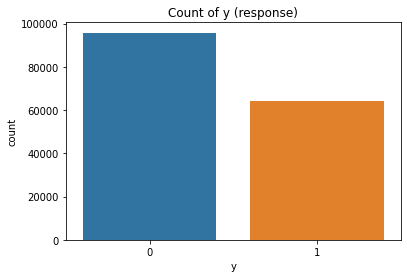

In [ ]:
#Bar chart showing the distribution of our response:

fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='y', data=df_wohe)
plt.title("Count of y (response)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


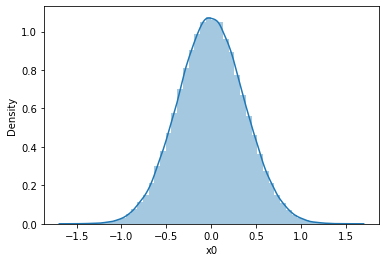

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


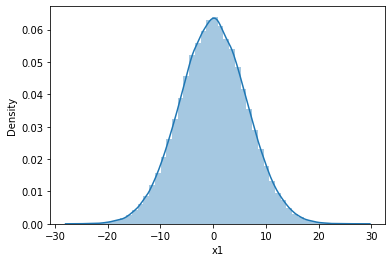

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


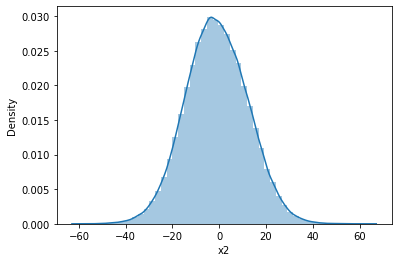

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


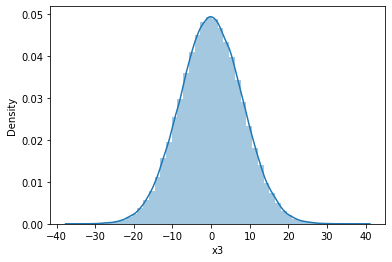

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


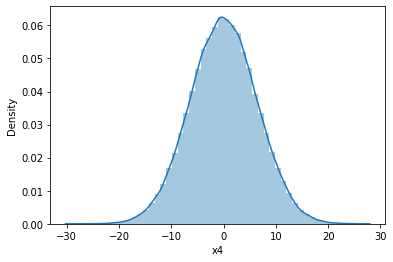

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


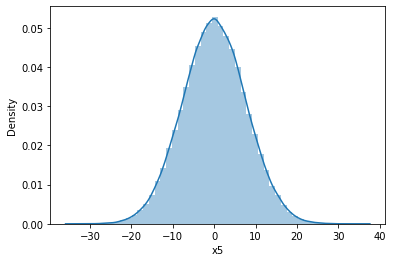

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


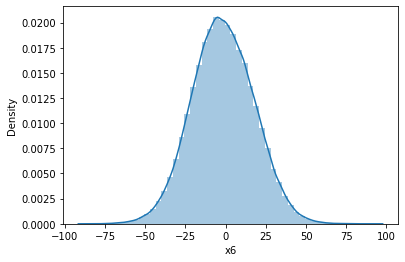

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


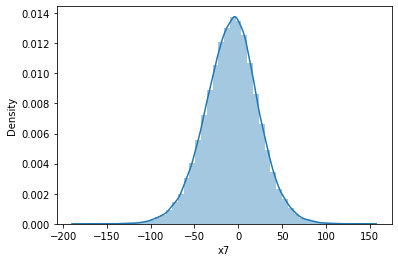

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


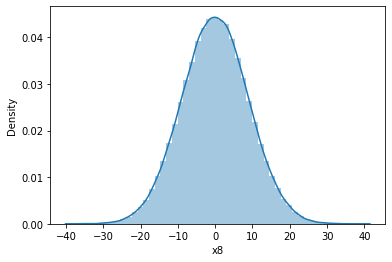

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


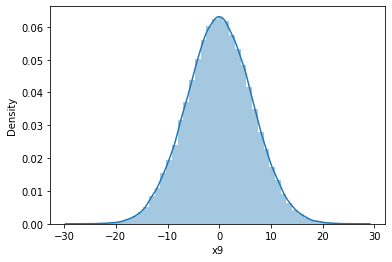

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


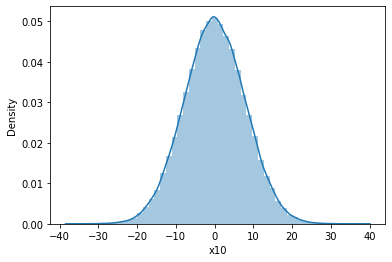

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


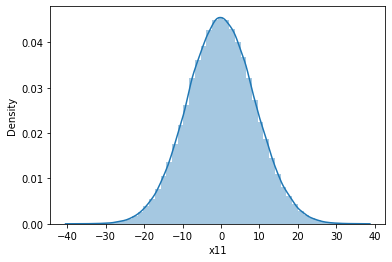

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


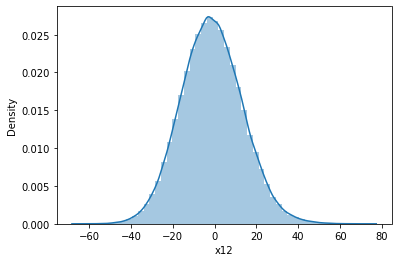

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


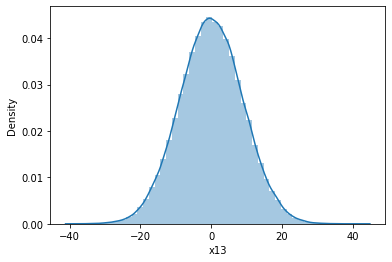

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


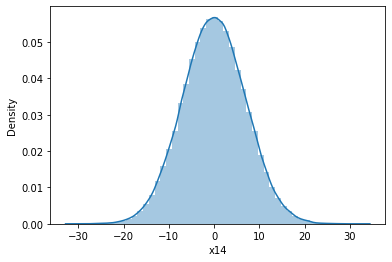

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


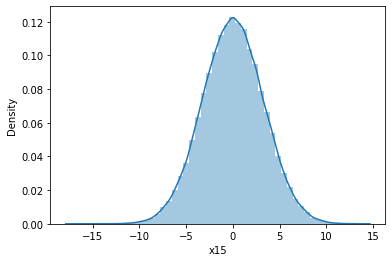

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


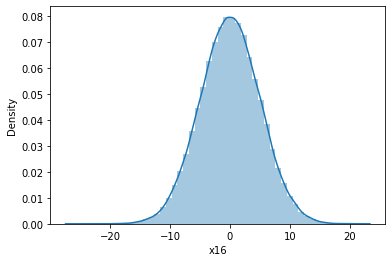

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


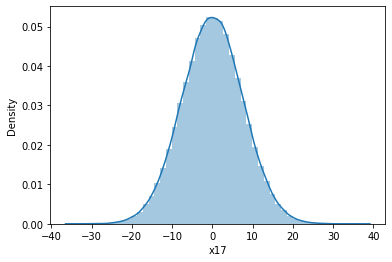

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


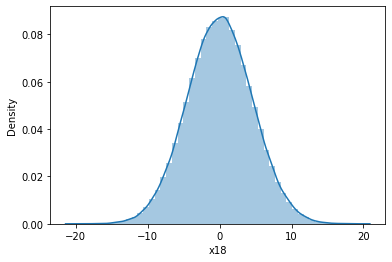

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


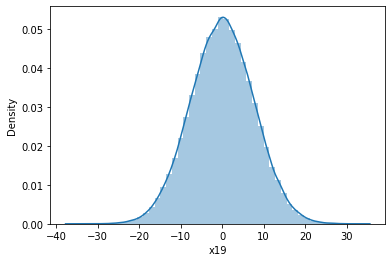

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


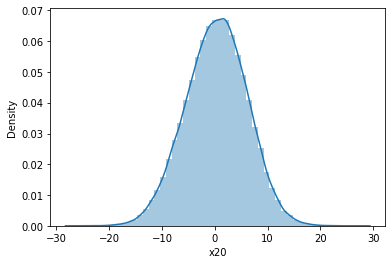

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


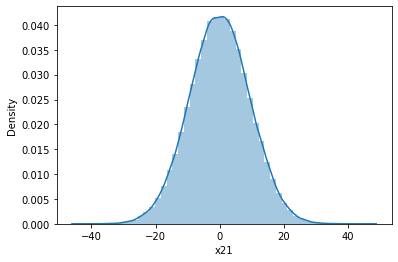

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


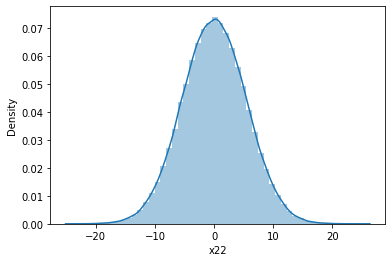

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


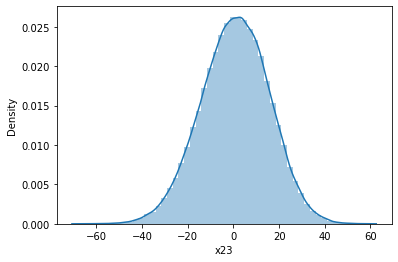

KeyError: ignored

In [ ]:
#Looping through diabetes_clean DF to view the distribution of all my variables:

for i in df.columns:
    sns.distplot(df_mean2[i])
    plt.show()

In [ ]:
#Finding columns with correlation coefficients > 1.

# Create correlation matrix
corr_matrix = df_wohe.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 1.0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [ ]:
to_drop

['x41']

# Catboost

## Catboost Mean

In [ ]:
df_cat_mean = df_mean.copy()

In [ ]:
target_col = ['y']
feature_cat_cols_mean = df_cat_mean.loc[:, ~df_cat_mean.columns.isin(target_col)].columns
X_cat_mean = df_cat_mean[feature_cat_cols_mean] # Features
y_cat_mean = df_cat_mean.y # Target variable

In [ ]:
X_cat_train_mean,X_cat_test_mean,y_cat_train_mean,y_cat_test_mean=train_test_split(X_cat_mean,y_cat_mean,test_size=0.20,random_state=0)

In [ ]:
print('X_cat_delay_train shape: ',X_cat_train_mean.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_mean.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_mean.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_mean.shape)

X_cat_delay_train shape:  (128000, 50) 

X_cat_delay_test shape:  (32000, 50) 

y_cat_delay_train shape:  (128000,) 

y_cat_delay_test shape:  (32000,)


In [ ]:
cat_feat_mean = df_cat_mean.select_dtypes(include=['object']).columns.tolist()

In [ ]:
cat_feat_mean

['x24', 'x29', 'x30']

In [ ]:
df_cat_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      160000 non-null  float64
 1   x1      160000 non-null  float64
 2   x2      160000 non-null  float64
 3   x3      160000 non-null  float64
 4   x4      160000 non-null  float64
 5   x5      160000 non-null  float64
 6   x6      160000 non-null  float64
 7   x7      160000 non-null  float64
 8   x8      160000 non-null  float64
 9   x9      160000 non-null  float64
 10  x10     160000 non-null  float64
 11  x11     160000 non-null  float64
 12  x12     160000 non-null  float64
 13  x13     160000 non-null  float64
 14  x14     160000 non-null  float64
 15  x15     160000 non-null  float64
 16  x16     160000 non-null  float64
 17  x17     160000 non-null  float64
 18  x18     160000 non-null  float64
 19  x19     160000 non-null  float64
 20  x20     160000 non-null  float64
 21  x21     16

In [ ]:
%%time
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          #'cat_features':cat_feat_mean,
          #'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_mean = CatBoostClassifier(**params)
cbc_mean.fit(X_cat_train_mean, y_cat_train_mean, cat_features= cat_feat_mean, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_mean, y_cat_test_mean), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6183816	test: 0.6197459	best: 0.6197459 (0)	total: 302ms	remaining: 5m 2s
200:	learn: 0.1740528	test: 0.1895933	best: 0.1895724 (199)	total: 48.5s	remaining: 3m 12s
400:	learn: 0.1492507	test: 0.1805450	best: 0.1805450 (400)	total: 1m 36s	remaining: 2m 24s
600:	learn: 0.1291480	test: 0.1738621	best: 0.1738621 (600)	total: 2m 35s	remaining: 1m 42s
800:	learn: 0.1139253	test: 0.1706227	best: 0.1706227 (800)	total: 3m 30s	remaining: 52.3s
999:	learn: 0.1018742	test: 0.1691128	best: 0.1691128 (999)	total: 4m 25s	remaining: 0us

bestTest = 0.1691127868
bestIteration = 999

CPU times: user 6min 49s, sys: 40.3 s, total: 7min 29s
Wall time: 4min 27s


In [ ]:
cbc_mean.plot_tree(tree_idx=298)

CatBoostError: ignored

In [ ]:
#get feature importance from Catboost model:
feature_importance = cbc_mean.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_mean.columns)[sorted_idx])
plt.title('Catboost Feature Importance: Mean')

In [ ]:
#Generating predictions for mean catboost model:

y_cat_pred = cbc_mean.predict(X_cat_test_mean)

In [ ]:
#Catboost mean data classification report:

print('\n', classification_report(y_cat_test_mean, y_cat_pred.round()))



               precision    recall  f1-score   support

           0       0.94      0.95      0.95     19064
           1       0.93      0.92      0.92     12936

    accuracy                           0.94     32000
   macro avg       0.94      0.93      0.93     32000
weighted avg       0.94      0.94      0.94     32000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


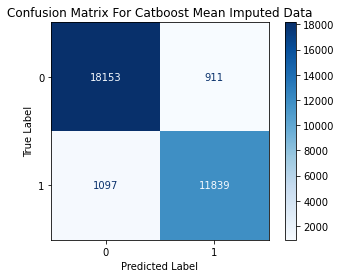

In [ ]:
#Catboost mean data confusion matrix for catboost:
 
color = 'black'
matrix = plot_confusion_matrix(cbc_mean, X_cat_test_mean, y_cat_test_mean, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix For Catboost Mean Imputed Data', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

## Catboost Median





In [ ]:
df_cat_median = df_median.copy()

In [ ]:
target_col = ['y']
feature_cat_cols_median = df_cat_median.loc[:, ~df_cat_median.columns.isin(target_col)].columns
X_cat_median = df_cat_median[feature_cat_cols_median] # Features
y_cat_median = df_cat_median.y # Target variable

In [ ]:
X_cat_train_median,X_cat_test_median,y_cat_train_median,y_cat_test_median=train_test_split(X_cat_median,y_cat_median,test_size=0.20,random_state=0)

In [ ]:
print('X_cat_delay_train shape: ',X_cat_train_median.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_median.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_median.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_median.shape)

X_cat_delay_train shape:  (128000, 50) 

X_cat_delay_test shape:  (32000, 50) 

y_cat_delay_train shape:  (128000,) 

y_cat_delay_test shape:  (32000,)


In [ ]:
cat_feat_median= df_cat_median.select_dtypes(include=['object']).columns.tolist()

In [ ]:
%%time
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          #'cat_features':cat_feat_median,
          #'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_median = CatBoostClassifier(**params)
cbc_median.fit(X_cat_train_median, y_cat_train_median, cat_features= cat_feat_median, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_median, y_cat_test_median), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6183781	test: 0.6197423	best: 0.6197423 (0)	total: 423ms	remaining: 7m 3s
200:	learn: 0.1765991	test: 0.1913628	best: 0.1913628 (200)	total: 57.2s	remaining: 3m 47s
400:	learn: 0.1504756	test: 0.1817810	best: 0.1817810 (400)	total: 2m 5s	remaining: 3m 7s
600:	learn: 0.1315737	test: 0.1762934	best: 0.1762126 (578)	total: 3m 2s	remaining: 2m 1s
800:	learn: 0.1153108	test: 0.1723637	best: 0.1723637 (800)	total: 4m 8s	remaining: 1m 1s
999:	learn: 0.1024454	test: 0.1709474	best: 0.1704536 (922)	total: 5m 8s	remaining: 0us

bestTest = 0.1704536131
bestIteration = 922

Shrink model to first 923 iterations.
CPU times: user 6min 49s, sys: 39.9 s, total: 7min 29s
Wall time: 5min 10s


In [ ]:
cbc_median.plot_tree(tree_idx=298)

In [ ]:
#get feature importance from Catboost model
feature_importance = cbc_median.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_median.columns)[sorted_idx])
plt.title('Catboost Feature Importance: Median')

In [ ]:
#Generating predictions for median catboost model:

y_cat_pred2 = cbc_median.predict(X_cat_test_median)

In [ ]:
#Catboost median data classification report:

print('\n', classification_report(y_cat_test_median, y_cat_pred2.round()))


               precision    recall  f1-score   support

           0       0.94      0.95      0.95     19064
           1       0.93      0.91      0.92     12936

    accuracy                           0.94     32000
   macro avg       0.94      0.93      0.93     32000
weighted avg       0.94      0.94      0.94     32000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


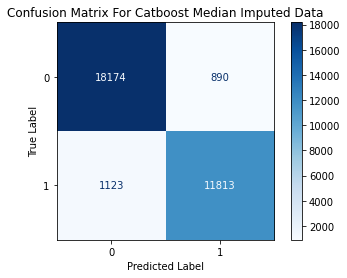

In [ ]:
#Catboost median data confusion matrix:
 
color = 'black'
matrix = plot_confusion_matrix(cbc_median, X_cat_test_median, y_cat_test_median, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix For Catboost Median Imputed Data', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

## Catboost Mode

In [ ]:
df_cat_mode = df_mode.copy()

In [ ]:
target_col = ['y']
feature_cat_cols_mode = df_cat_mode.loc[:, ~df_cat_mode.columns.isin(target_col)].columns
X_cat_mode = df_cat_mean[feature_cat_cols_mode] # Features
y_cat_mode = df_cat_mode.y # Target variable

In [ ]:
X_cat_train_mode,X_cat_test_mode,y_cat_train_mode,y_cat_test_mode=train_test_split(X_cat_mode,y_cat_mode,test_size=0.20,random_state=0)

In [ ]:
print('X_cat_delay_train shape: ',X_cat_train_mode.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_mode.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_mode.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_mode.shape)

In [ ]:
cat_feat_mode= df_cat_mode.select_dtypes(include=['category']).columns.tolist()

In [ ]:
%%time
#CatBoost for Is_delay
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          'cat_features':cat_feat_mode,
          'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_mode = CatBoostClassifier(**params)
cbc_mode.fit(X_cat_train_mode, y_cat_train_mode, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_mode, y_cat_test_mode), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

In [ ]:
cbc_mode.plot_tree(tree_idx=298)

In [ ]:
#get feature importance from Catboost model
feature_importance = cbc_mode.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_mode.columns)[sorted_idx])
plt.title('Catboost Feature Importance: Mode')

## Drop Catboost

In [ ]:
df_cat_drop = df_drop.copy()

In [ ]:
target_col = ['y']
feature_cat_cols_drop = df_cat_drop.loc[:, ~df_cat_drop.columns.isin(target_col)].columns
X_cat_drop = df_cat_drop[feature_cat_cols_drop] # Features
y_cat_drop = df_cat_drop.y # Target variable

In [ ]:
X_cat_train_drop,X_cat_test_drop,y_cat_train_drop,y_cat_test_drop=train_test_split(X_cat_drop,y_cat_drop,test_size=0.20,random_state=0)

In [ ]:
print('X_cat_delay_train shape: ',X_cat_train_drop.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_drop.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_drop.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_drop.shape)

X_cat_delay_train shape:  (126784, 50) 

X_cat_delay_test shape:  (31696, 50) 

y_cat_delay_train shape:  (126784,) 

y_cat_delay_test shape:  (31696,)


In [ ]:
cat_feat_drop= df_cat_drop.select_dtypes(include=['object']).columns.tolist()

In [ ]:
%%time
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          #'cat_features':cat_feat_drop,
          #'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_drop = CatBoostClassifier(**params)
cbc_drop.fit(X_cat_train_drop, y_cat_train_drop, cat_features= cat_feat_drop, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_drop, y_cat_test_drop), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6227534	test: 0.6219940	best: 0.6219940 (0)	total: 241ms	remaining: 4m
200:	learn: 0.1770486	test: 0.1927986	best: 0.1927271 (194)	total: 46.4s	remaining: 3m 4s
400:	learn: 0.1506604	test: 0.1826210	best: 0.1825217 (393)	total: 1m 34s	remaining: 2m 20s
600:	learn: 0.1303928	test: 0.1764882	best: 0.1764882 (600)	total: 2m 21s	remaining: 1m 34s
800:	learn: 0.1153158	test: 0.1737117	best: 0.1736092 (791)	total: 3m 11s	remaining: 47.7s
999:	learn: 0.1031124	test: 0.1722013	best: 0.1721319 (990)	total: 4m 1s	remaining: 0us

bestTest = 0.1721319296
bestIteration = 990

Shrink model to first 991 iterations.
CPU times: user 6min 45s, sys: 39.9 s, total: 7min 25s
Wall time: 4min 3s


In [ ]:
cbc_drop.plot_tree(tree_idx=298)

Text(0.5, 1.0, 'Catboost Feature Importance: Drop')

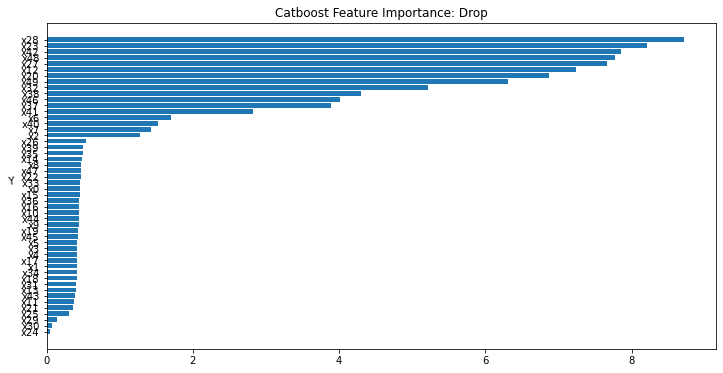

In [ ]:
#get feature importance from Catboost model
feature_importance = cbc_drop.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_drop.columns)[sorted_idx])

plt.title('Catboost Feature Importance: Drop')

In [ ]:
#Generating predictions for drop catboost model:

y_cat_drop_pred = cbc_drop.predict(X_cat_test_drop)

In [ ]:
#Catboost median data classification report:

print('\n', classification_report(y_cat_test_drop, y_cat_drop_pred.round()))


               precision    recall  f1-score   support

           0       0.94      0.95      0.95     19033
           1       0.92      0.91      0.92     12663

    accuracy                           0.93     31696
   macro avg       0.93      0.93      0.93     31696
weighted avg       0.93      0.93      0.93     31696



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


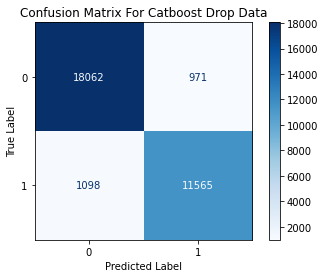

In [ ]:
#Catboost median data confusion matrix:
 
color = 'black'
matrix = plot_confusion_matrix(cbc_drop, X_cat_test_drop, y_cat_test_drop, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix For Catboost Drop Data', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# Random Forest

## Random Forest Mean

In [ ]:
#Creating a copy of our original data frame for rf mean modeling:

df_rf_mean = df_mean2.copy()

In [ ]:
#Separating feature columns from our response:
target_col = ['y']
feature_rf_cols_mean = df_rf_mean.loc[:, ~df_rf_mean.columns.isin(target_col)].columns
X_rf_mean = df_rf_mean[feature_rf_cols_mean] # Features
y_rf_mean = df_rf_mean.y # Target variable

In [ ]:
# Split the data into 80/20 train and test sets:
X_rf_train_mean, X_rf_test_mean, y_rf_train_mean, y_rf_test_mean = train_test_split(X_rf_mean,
                                                    y_rf_mean,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
#Viewing shape of our rf_mean splits:

print('X_rf_delay_train shape: ',X_rf_train_mean.shape,'\n')
print('X_rf_delay_test shape: ',X_rf_test_mean.shape,'\n')
print('y_rf_delay_train shape: ',y_rf_train_mean.shape,'\n')
print('y_rf_delay_test shape: ',y_rf_test_mean.shape)

X_rf_delay_train shape:  (128000, 62) 

X_rf_delay_test shape:  (32000, 62) 

y_rf_delay_train shape:  (128000,) 

y_rf_delay_test shape:  (32000,)


In [ ]:
#Initializing our RF model:
model = RandomForestClassifier(random_state=0,n_jobs=-1,criterion='gini',n_estimators=100,max_depth=10,max_features='sqrt',oob_score=True,bootstrap=True)

model.fit(X_rf_train_mean, y_rf_train_mean)
y_pred = model.predict(X_rf_test_mean)

In [ ]:
#Classification report for RF mean data:

print('\n', classification_report(y_rf_test_mean, y_pred.round()))


               precision    recall  f1-score   support

           0       0.84      0.95      0.89     19064
           1       0.91      0.74      0.81     12936

    accuracy                           0.86     32000
   macro avg       0.87      0.84      0.85     32000
weighted avg       0.87      0.86      0.86     32000



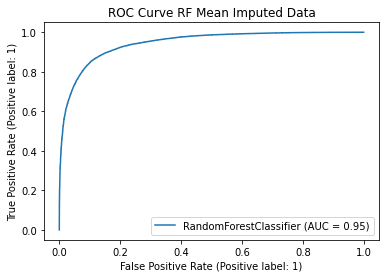

In [ ]:
#Displaying ROC curve for RF:

svc_disp = RocCurveDisplay.from_estimator(model, X_rf_test_mean, y_rf_test_mean)
plt.title("ROC Curve RF Mean Imputed Data")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_rf_test_mean, y_pred)
cm

array([[18080,   984],
       [ 3369,  9567]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


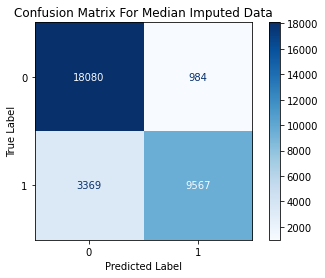

In [ ]:
#Generating a CM for RF mean imputed data:
 
color = 'black'
matrix = plot_confusion_matrix(model, X_rf_test_mean, y_rf_test_mean, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix For Median Imputed Data', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

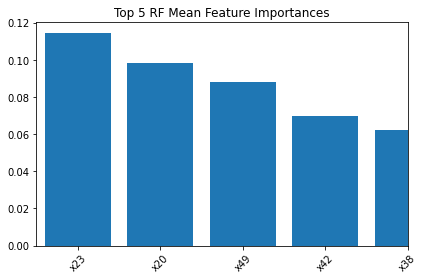

In [ ]:
#RF Mean Feature importances:
 
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.title('Top 5 RF Mean Feature Importances')
plt.bar(range(X_rf_train_mean.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_rf_train_mean.shape[1]), X_rf_train_mean.columns[sorted_indices], rotation=45)
plt.xlim(-0.5,4)  # adjust as necessary
plt.tight_layout()
plt.show()

## RF on median imputed data

In [ ]:
#Creating a copy of our original data frame for rf median modeling:

df_rf_median = df_median2.copy()

In [ ]:
#Separating feature columns from our response:

target_col = ['y']
feature_rf_cols_median = df_rf_median.loc[:, ~df_rf_median.columns.isin(target_col)].columns
X_rf_median = df_rf_median[feature_rf_cols_median] # Features
y_rf_median = df_rf_median.y # Target variable

In [ ]:
# Split the data into 80/20 train and test sets:
X_rf_train_median, X_rf_test_median, y_rf_train_median, y_rf_test_median = train_test_split(X_rf_median,
                                                    y_rf_median,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
#Viewing shape of our rf_mean splits:

print('X_rf_delay_train shape: ',X_rf_train_median.shape,'\n')
print('X_rf_delay_test shape: ',X_rf_test_median.shape,'\n')
print('y_rf_delay_train shape: ',y_rf_train_median.shape,'\n')
print('y_rf_delay_test shape: ',y_rf_test_median.shape)

X_rf_delay_train shape:  (128000, 62) 

X_rf_delay_test shape:  (32000, 62) 

y_rf_delay_train shape:  (128000,) 

y_rf_delay_test shape:  (32000,)


In [ ]:
#Building our rf_mean model with best hypers from GridSearchCV: CHANGE THESE

rfc_median_model=RandomForestClassifier(max_features='auto', n_estimators= 200, max_depth=9, criterion='gini')

In [ ]:
#Fitting our rf_median model:

rfc_median_model.fit(X_rf_train_median, y_rf_train_median)

RandomForestClassifier(max_depth=9, n_estimators=200)

In [ ]:
#Generating predictions for our model:

y_rf_median_pred=rfc_median_model.predict(X_rf_test_median)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_rf_test_median,y_rf_median_pred))

Accuracy for Random Forest on CV data:  0.84740625


In [ ]:
#Classification report for RF mean data:

print('\n', classification_report(y_rf_test_median, y_rf_median_pred.round()))


               precision    recall  f1-score   support

           0       0.82      0.95      0.88     19064
           1       0.90      0.70      0.79     12936

    accuracy                           0.85     32000
   macro avg       0.86      0.82      0.83     32000
weighted avg       0.85      0.85      0.84     32000



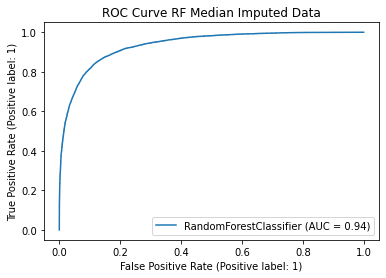

In [ ]:
#Displaying ROC curve for RF:

svc_disp = RocCurveDisplay.from_estimator(rfc_median_model, X_rf_test_median, y_rf_test_median)
plt.title("ROC Curve RF Median Imputed Data")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


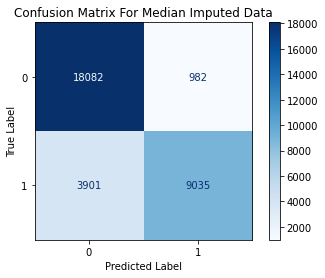

In [ ]:
#Generating a CM for RF median imputed data:
 
color = 'black'
matrix = plot_confusion_matrix(rfc_median_model, X_rf_test_median, y_rf_test_median, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix For Median Imputed Data', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

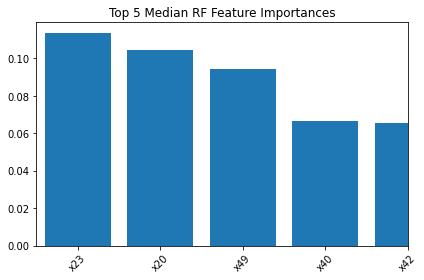

In [ ]:
#RF Median Feature importances:
 
importances = rfc_median_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.title('Top 5 Median RF Feature Importances')
plt.bar(range(X_rf_train_median.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_rf_train_median.shape[1]), X_rf_train_median.columns[sorted_indices], rotation=45)
plt.xlim(-0.5,4)  # adjust as necessary
plt.tight_layout()
plt.show()


#NB Modeling 

## NB Mean

In [ ]:
#Creating a copy of our original data frame for nb mean modeling:

df_nb_mean = df_mean2.copy()

In [ ]:
#Separating feature columns from our response:

target_col = ['y']
feature_nb_cols_mean = df_nb_mean.loc[:, ~df_nb_mean.columns.isin(target_col)].columns
X_nb_mean = df_nb_mean[feature_nb_cols_mean] # Features
y_nb_mean = df_nb_mean.y # Target variable

In [ ]:
#Scaling data using a standard scaler:

scaler = StandardScaler()

X_nb_mean = scaler.fit_transform(X_nb_mean)

In [ ]:
# Split the data into 80/20 train and test sets:

X_nb_train_mean, X_nb_test_mean, y_nb_train_mean, y_nb_test_mean = train_test_split(X_nb_mean,
                                                    y_nb_mean,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
#Viewing shape of our rf_mean splits:

print('X_rf_delay_train shape: ',X_nb_train_mean.shape,'\n')
print('X_rf_delay_test shape: ',X_nb_test_mean.shape,'\n')
print('y_rf_delay_train shape: ',y_nb_train_mean.shape,'\n')
print('y_rf_delay_test shape: ',y_nb_test_mean.shape)

X_rf_delay_train shape:  (128000, 62) 

X_rf_delay_test shape:  (32000, 62) 

y_rf_delay_train shape:  (128000,) 

y_rf_delay_test shape:  (32000,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_nb_train_mean, y_nb_train_mean)
  
# making predictions on the testing set
y_nb_mean_pred = gnb.predict(X_nb_test_mean)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_nb_test_mean, y_nb_mean_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 69.409375


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


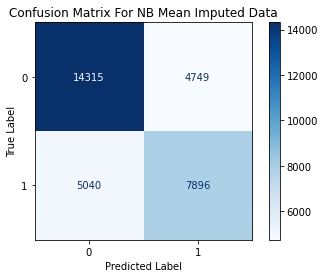

In [ ]:
#Generating a CM for NB mean imputed data:
 
color = 'black'
matrix = plot_confusion_matrix(gnb, X_nb_test_mean, y_nb_test_mean, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix For NB Mean Imputed Data', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_nb_test_mean, y_nb_mean_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     19064
           1       0.62      0.61      0.62     12936

    accuracy                           0.69     32000
   macro avg       0.68      0.68      0.68     32000
weighted avg       0.69      0.69      0.69     32000



## NB Median

In [ ]:
#Creating a copy of our original data frame for nb mean modeling:

df_nb_median = df_median2.copy()

In [ ]:
#Separating feature columns from our response:

target_col = ['y']
feature_nb_cols_median = df_nb_median.loc[:, ~df_nb_median.columns.isin(target_col)].columns
X_nb_median = df_nb_median[feature_nb_cols_median] # Features
y_nb_median = df_nb_median.y # Target variable

In [ ]:
#Scaling data using a standard scaler:

X_nb_median = scaler.fit_transform(X_nb_median)

In [ ]:
# Split the data into 80/20 train and test sets:

X_nb_train_median, X_nb_test_median, y_nb_train_median, y_nb_test_median = train_test_split(X_nb_median,
                                                    y_nb_median,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
#Viewing shape of our nb_median splits:

print('X_rf_delay_train shape: ',X_nb_train_median.shape,'\n')
print('X_rf_delay_test shape: ',X_nb_test_median.shape,'\n')
print('y_rf_delay_train shape: ',y_nb_train_median.shape,'\n')
print('y_rf_delay_test shape: ',y_nb_test_median.shape)



X_rf_delay_train shape:  (128000, 62) 

X_rf_delay_test shape:  (32000, 62) 

y_rf_delay_train shape:  (128000,) 

y_rf_delay_test shape:  (32000,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_nb_train_median, y_nb_train_median)
  
# making predictions on the testing set
y_nb_median_pred = gnb.predict(X_nb_test_median)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_nb_test_median, y_nb_median_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 69.409375


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


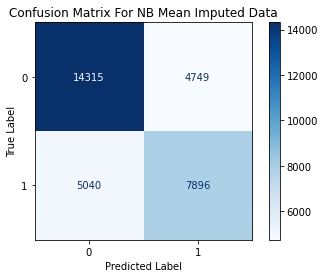

In [ ]:
#Generating a CM for NB median imputed data:
 
color = 'black'
matrix = plot_confusion_matrix(gnb, X_nb_test_median, y_nb_test_median, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix For NB Mean Imputed Data', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:

print(classification_report(y_nb_test_median, y_nb_median_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     19064
           1       0.62      0.61      0.62     12936

    accuracy                           0.69     32000
   macro avg       0.68      0.68      0.68     32000
weighted avg       0.69      0.69      0.69     32000



## SVM Modeling:

## SVM Mean:

In [ ]:
seed = 0 

In [ ]:
#Creating a copy of our original data frame for nb mean modeling:

df_svm_mean = df_mean2.copy()

In [ ]:
#Separating feature columns from our response:

target_col = ['y']
feature_svm_cols_mean = df_svm_mean.loc[:, ~df_svm_mean.columns.isin(target_col)].columns
X_svm_mean = df_svm_mean[feature_svm_cols_mean] # Features
y_svm_mean = df_svm_mean.y # Target variable

In [ ]:
# Split the data into 80/20 train and test sets:

X_svm_train_mean, X_svm_test_mean, y_svm_train_mean, y_svm_test_mean = train_test_split(X_svm_mean,
                                                    y_svm_mean,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
#Scaling data with Standard Scaler:

scaler = StandardScaler()

X_svm_mean = scaler.fit_transform(X_svm_mean)

### Mean Linear Kernel

In [ ]:
#For loop that fits our SVM model with a linear kernel to different values of C:

cs = [0.3,0.4,0.5,0.6,0.7]
for idx , c in enumerate(cs,start=0):
    globals()[f'linear_{idx}'] = svm.SVC(kernel='linear', C=c, cache_size=2000).fit(X_svm_train_mean, y_svm_train_mean)
    globals()[f'linear_pred_{idx}'] = globals()[f'linear_{idx}'].predict(X_svm_test_mean)

In [ ]:
#For loop that returns a classification reports for our fits above:

for i in range(0,5):
    print(classification_report(y_svm_test_mean,globals()[f'linear_pred_{i}']));
    globals()[f'linear_cm_{i}'] = confusion_matrix(y_svm_test_mean, globals()[f'linear_pred_{i}'])
    plt.figure()
    sns.heatmap(globals()[f'linear_cm_{i}'], annot=True, fmt='d')

### Mean Polynomial Kernel

In [ ]:
#For loop that fits our SVM model with a linear kernel to different values of C:

cs = [0.3,0.4,0.5,0.6,0.7]
for idx , c in enumerate(cs,start=0):
    globals()[f'linear_{idx}'] = svm.SVC(kernel='poly', C=c, cache_size=2000).fit(X_svm_train_mean, y_svm_train_mean)
    globals()[f'linear_pred_{idx}'] = globals()[f'linear_{idx}'].predict(X_svm_test_mean)

In [ ]:
#For loop that returns a classification reports for our fits above:

for i in range(0,5):
    print(classification_report(y_svm_test_mean,globals()[f'linear_pred_{i}']));
    globals()[f'linear_cm_{i}'] = confusion_matrix(y_svm_test_mean, globals()[f'linear_pred_{i}'])
    plt.figure()
    sns.heatmap(globals()[f'linear_cm_{i}'], annot=True, fmt='d')

## SVM Median Modeling

### Linear Kernel

In [ ]:
#Creating a copy of our original data frame for nb mean modeling:

df_svm_median = df_median2.copy()

In [ ]:
#Separating feature columns from our response:

target_col = ['y']
feature_svm_cols_median = df_svm_median.loc[:, ~df_svm_median.columns.isin(target_col)].columns
X_svm_median = df_svm_median[feature_svm_cols_median] # Features
y_svm_median = df_svm_median.y # Target variable

In [ ]:
#Scaling data using a standard scaler:

X_svm_median = scaler.fit_transform(X_svm_median)

NameError: ignored

In [ ]:
# Split the data into 80/20 train and test sets:

X_svm_train_median, X_svm_test_median, y_svm_train_median, y_svm_test_median = train_test_split(X_svm_median,
                                                    y_svm_median,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
#For loop that fits our SVM model with a linear kernel to different values of C:

cs = [0.3,0.4,0.5,0.6,0.7]
for idx , c in enumerate(cs,start=0):
    globals()[f'linear_{idx}'] = svm.SVC(kernel='linear', C=c, cache_size=2000).fit(X_svm_train_median, y_svm_train_median)
    globals()[f'linear_pred_{idx}'] = globals()[f'linear_{idx}'].predict(X_svm_test_median)

In [ ]:
#For loop that returns a classification reports for our fits above:

for i in range(0,5):
    print(classification_report(y_svm_test_median,globals()[f'linear_pred_{i}']));
    globals()[f'linear_cm_{i}'] = confusion_matrix(y_svm_test_median, globals()[f'linear_pred_{i}'])
    plt.figure()
    sns.heatmap(globals()[f'linear_cm_{i}'], annot=True, fmt='d')

### Median Polynomial Kernel

In [ ]:
#For loop that fits our SVM model with a linear kernel to different values of C:

cs = [0.3,0.4,0.5,0.6,0.7]
for idx , c in enumerate(cs,start=0):
    globals()[f'linear_{idx}'] = svm.SVC(kernel='poly', C=c, cache_size=2000).fit(X_svm_train_median, y_svm_train_median)
    globals()[f'linear_pred_{idx}'] = globals()[f'linear_{idx}'].predict(X_svm_test_median)

In [ ]:
#For loop that returns a classification reports for our fits above:

for i in range(0,5):
    print(classification_report(y_svm_test_median,globals()[f'linear_pred_{i}']));
    globals()[f'linear_cm_{i}'] = confusion_matrix(y_svm_test_median, globals()[f'linear_pred_{i}'])
    plt.figure()
    sns.heatmap(globals()[f'linear_cm_{i}'], annot=True, fmt='d')